In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
df = pd.read_csv('teleCust1000t.csv')
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [21]:
#Seleciona as variáveis independentes e dependentes para o algorítimo
x = np.asanyarray(df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values)
y = np.asanyarray(df[['custcat']].values)

#Preparação dos dados para um algorítimo de classificação
#A padronização deixa os dados em float padronizando a média em 0 e com a variância unitária
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [22]:
#Separação de bases de teste e treinamento
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2,random_state= 4)

In [23]:
#Criação do modelo de classificação
#Definição do número de vizinhos que serão avaliados e treinamento do modelo

n_neighbors = KNeighborsClassifier(n_neighbors=4).fit(x_treino,y_treino)

c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
#Previsão dos valores de "cutscast" 
y_predict = n_neighbors.predict(x_teste)

#Medir a acurácia do modelo dividindo o número de previsões corretas pelo número de previsões totais
accurace = metrics.accuracy_score(y_teste, y_predict)
print(accurace)

0.32


In [28]:
#Devido a baixa acurácia do algorítimo de 0,32 será testado outros valores de n_neighbors

max_nb = 10
accuraces = []
for i in range(1,int(max_nb) + 1):
    n_neighbors_test = KNeighborsClassifier(n_neighbors=i).fit(x_treino,y_treino)
    y_pred_test = n_neighbors_test.predict(x_teste)
    accurace_test = metrics.accuracy_score(y_teste,y_pred_test)
    accuraces.append(accurace_test)

c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\augus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

10
10


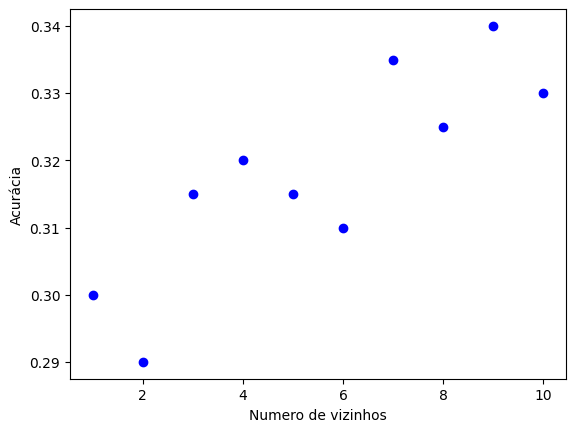

In [29]:
n_neighbors_x = [1,2,3,4,5,6,7,8,9,10]
print(len(accuraces))
print(len(n_neighbors_x))
plt.scatter(n_neighbors_x,accuraces,color = "blue")
plt.xlabel('Numero de vizinhos')
plt.ylabel('Acurácia')
plt.show()


In [30]:
print('Conclusão: A melhor acurácia foi de 0,34 para 9 vizinhos próximos')

Conclusão: A melhor acurácia foi de 0,34 para 9 vizinhos próximos
